In [1]:
import numpy as np
import pandas as pd
import glob
folderPath = 'estimate*'
Data = []
MAX = 10870000
N = 10253550
def summary(data):
    budget = data.shape[0]
    if budget == 0:
        return [0,0]
    s = np.sum(data,axis=0)[2]    
    result = s / budget * MAX/100
    
    return [budget, (result - N)/N*100]

for folder in glob.glob(folderPath):    
    count = 0
    if folder !='Estimate.py':        
        path = folder + '/estimate_*.csv'
        for fname in glob.glob(path):
            data = np.genfromtxt(fname, delimiter=',')
            s = summary(data)
            if s[0] == 0:
                continue
            if s[0] == 100:
                count += 1
            Data.append(s)        

In [2]:
d = np.array(Data)
P = np.zeros((50,5))
i100 = 0
i200 = 0
i300 = 0
i400 = 0
i500 = 0

for i in range(d.shape[0]):
    if d[i][0] == 100:
        P[i100][0] = d[i][1]
        i100 += 1
    if d[i][0] == 200:
        P[i200][1] = d[i][1]
        i200 += 1
    if d[i][0] == 300:
        P[i300][2] = d[i][1]
        i300 += 1
    if d[i][0] == 400:
        P[i400][3] = d[i][1]
        i400 += 1
    if d[i][0] == 500:
        P[i500][4] = d[i][1]
        i500 += 1

In [16]:
# df = pd.DataFrame(P, columns=['100', '200', '300', '400', '500'])
df.describe()

,100,200,300,400,500
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.055642,0.059487,0.075671,0.034872,-0.010523
std,0.748987,0.372929,0.336763,0.245682,0.126764
min,-1.302768,-1.175554,-0.603089,-0.572185,-0.282679
25%,-0.762107,-0.123384,-0.155188,-0.094231,-0.085991
50%,0.091290,0.093941,0.107192,0.025033,0.004230
75%,0.549793,0.360296,0.313032,0.219167,0.061019
max,1.432343,0.631952,0.937620,0.547142,0.270679


C:\Users\Tomas Wen\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


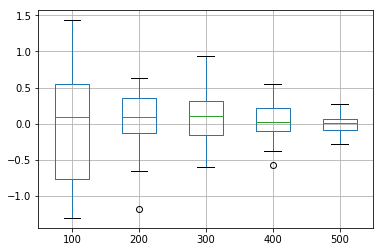

In [20]:
df.plot.box(grid='True')